Import pack

In [43]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import math

Load ADS crash data

In [2]:
ADS_filepath = os.path.join(os.getcwd(), 'datasets', 'SGO-2021-01_Incident_Reports_ADS.csv')
ADS_data = pd.read_csv(ADS_filepath)
ADS_data

,Report ID,Report Version,Reporting Entity,Report Type,Report Month,Report Year,Report Submission Date,VIN,VIN - Unknown,Serial Number,...,Investigating Officer Name,Inv. Officer Name - Unknown,Investigating Officer Phone,Inv. Officer Phone - Unknown,Investigating Officer Email,Inv. Officer Email - Unknown,Within ODD?,Within ODD? - CBI,Narrative,Narrative - CBI?
0,30270-3655,1,Waymo LLC,Monthly,7.0,2022.0,AUG-2022,SADHW2S13M1,,NaN,...,NaN,,NaN,,NaN,,Yes,,"On June [XXX], 2022 at approximately 4:50 PM P...",
1,540-3644,1,"General Motors, LLC",Monthly,7.0,2022.0,AUG-2022,5G21A6P0XL4,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On August [XXX, 2022, GM Cruise Holdings LLC (...",
2,540-3645,1,"General Motors, LLC",Monthly,7.0,2022.0,AUG-2022,5G21A6P09L4,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On August [XXX], 2022, GM Cruise Holdings LLC ...",
3,540-3643,1,"General Motors, LLC",Monthly,7.0,2022.0,AUG-2022,5G21A6P01N4,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On August [XXX], 2022 GM Cruise Holdings LLC (...",
4,540-3647,1,"General Motors, LLC",Monthly,7.0,2022.0,AUG-2022,5G21A6P08L4,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On August [XXX], GM Cruise Holdings LLC (""Crui...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,30270-1,2,Waymo LLC,10-Day Update,NaN,NaN,JUL-2021,2C4RC1K76HR,,NaN,...,NaN,,NaN,,NaN,,Yes,,No update to narrative. Please refer to Waymo ...,
378,30531-6,1,Transdev Alternative Services,1-Day,NaN,NaN,JUL-2021,SADHW2S14M1,,NaN,...,NaN,Y,NaN,Y,NaN,Y,Yes,,"On July [XXX], 2021 at 4:47 PM PDT, a Waymo Au...",
379,30270-4,1,Waymo LLC,1-Day,NaN,NaN,JUL-2021,SADHW2S14M1,,NaN,...,NaN,Y,NaN,Y,NaN,Y,Yes,,"On July [XXX], 2021 at 4:47 PM PDT, a Waymo Au...",
380,30531-2,1,Transdev Alternative Services,1-Day,NaN,NaN,JUL-2021,2C4RC1K76HR,,NaN,...,NaN,,NaN,,NaN,,Yes,,"On July [XXX], 2021 at 3:10 PM PDT, a Waymo Au...",


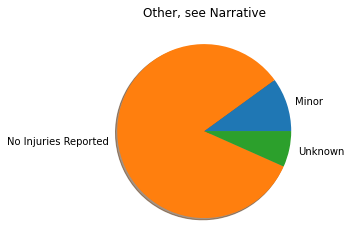

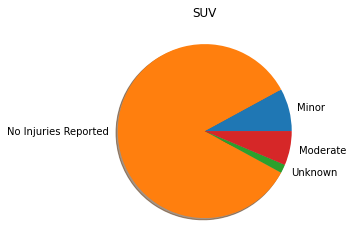

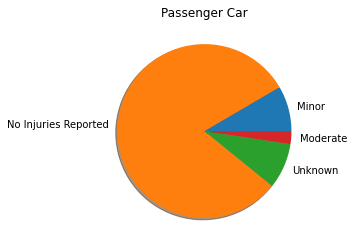

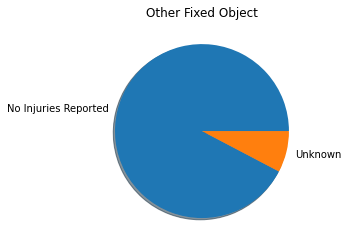

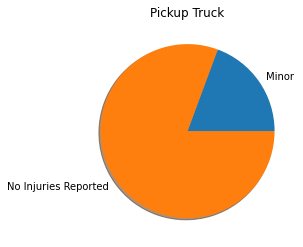

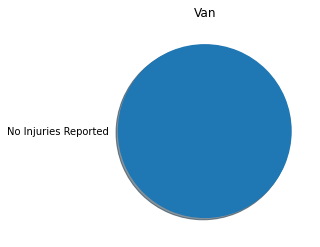

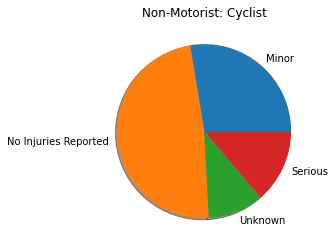

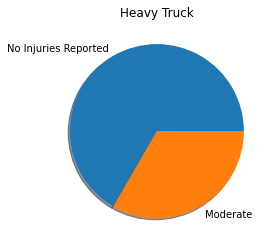

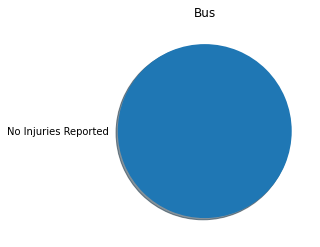

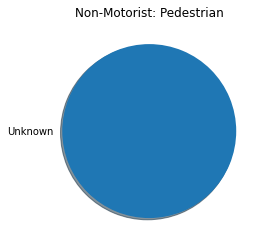

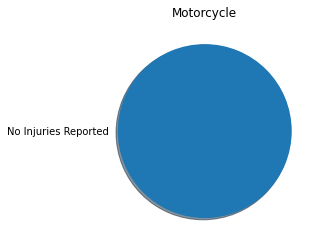

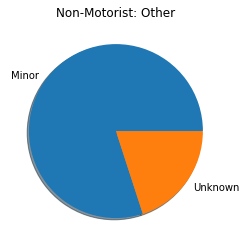

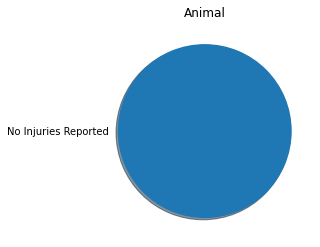

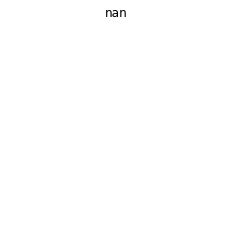

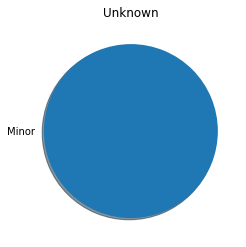

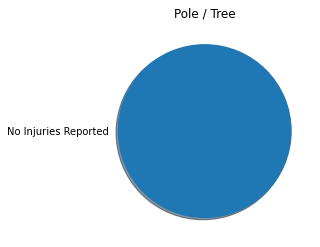

In [44]:
ADS_crashes = ADS_data[['Crash With', 'Highest Injury Severity']]
ADS_crash_types = ADS_crashes['Crash With'].unique()
ADS_crash_severity = ADS_crashes['Highest Injury Severity'].unique()
ADS_crashes

plot_values = dict()

for i in ADS_crash_types:
    plot_values[i] = {}
    crash_type = ADS_crashes[ADS_crashes['Crash With'] == (i)]
    for j in ADS_crash_severity:
        crash_severity = crash_type[crash_type['Highest Injury Severity'] == (j)]['Highest Injury Severity'].count()
        if crash_severity != 0:
            plot_values[i][j] = crash_severity
    if i != 'nan':
        plt.pie(plot_values[i].values(), labels = plot_values[i].keys(), shadow = True)
        plt.title(i)
        plt.show() 

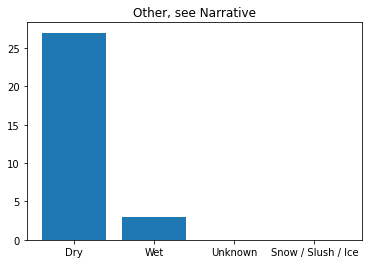

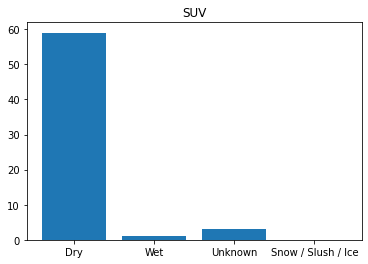

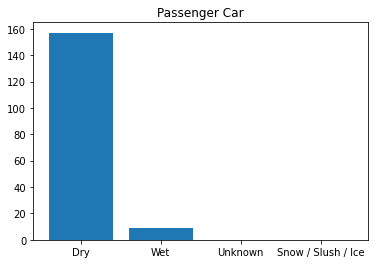

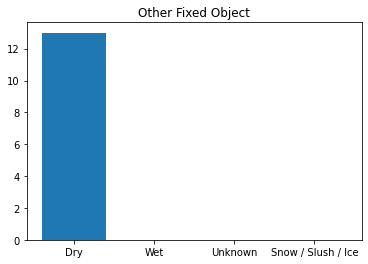

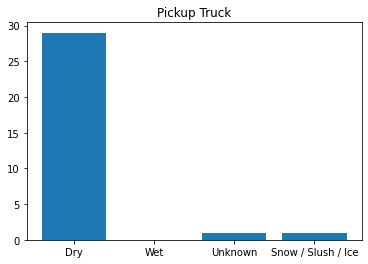

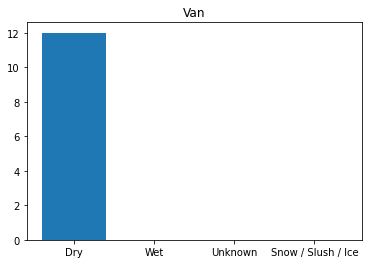

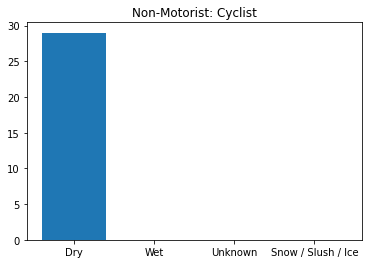

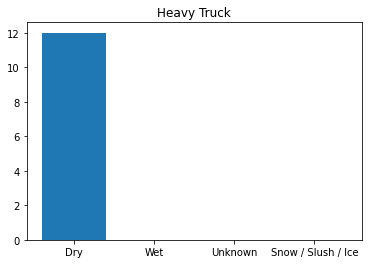

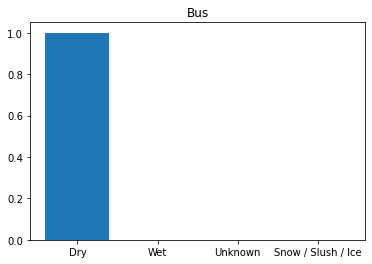

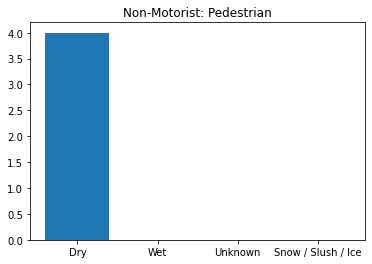

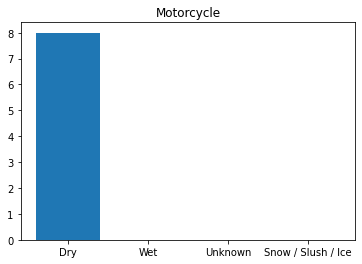

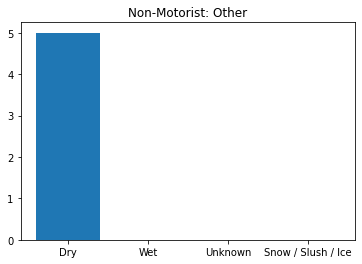

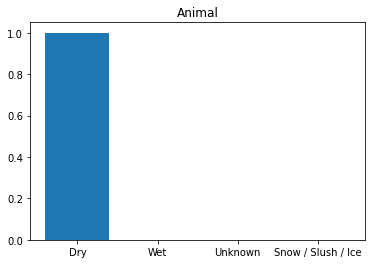

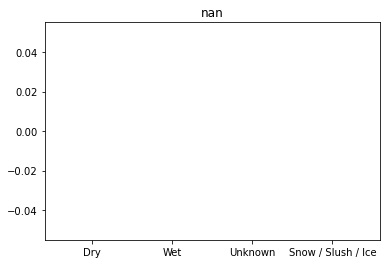

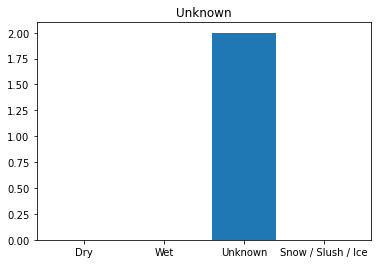

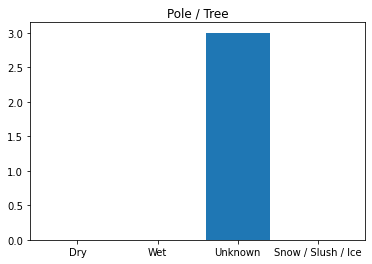

In [45]:
ADS_crashes = ADS_data[['Crash With', 'Roadway Surface']]
ADS_crash_types = ADS_crashes['Crash With'].unique()
ADS_crash_severity = ADS_crashes['Roadway Surface'].unique()
ADS_crashes.tail(50)

for i in ADS_crash_types:
    crash_severities = []
    environment = []
    crash_type = ADS_crashes[ADS_crashes['Crash With'] == (i)]
    for j in ADS_crash_severity:
        environment.append(j)
        crash_severity = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface']
        crash_severity_count = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface'].count()
        crash_severities.append(crash_severity_count)
    for k in range(len(environment)-1):
        if not isinstance(environment[k], str):
            if math.isnan(environment[k]):
                environment.pop(k)
                crash_severities.pop(k)
    plt.bar(environment, crash_severities)
    plt.title(i)
    plt.show() 

Load ADAS crash data

In [47]:
ADAS_filepath = os.path.join(os.getcwd(), 'datasets', 'SGO-2021-01_Incident_Reports_ADAS.csv')
ADAS_data = pd.read_csv(ADAS_filepath)
ADAS_data

,Report ID,Report Version,Reporting Entity,Report Type,Report Month,Report Year,Report Submission Date,VIN,VIN - Unknown,Serial Number,...,Investigating Officer Name,Inv. Officer Name - Unknown,Investigating Officer Phone,Inv. Officer Phone - Unknown,Investigating Officer Email,Inv. Officer Email - Unknown,Within ODD?,Within ODD? - CBI,Narrative,Narrative - CBI?
0,10039-3261,4,"BMW of North America, LLC",Monthly Update,8.0,2022.0,AUG-2022,WBA53BJ08NC,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"Customer narrative: [REDACTED, MAY CONTAIN CO...",Y
1,13781-3622,1,"Tesla, Inc.",1-Day,NaN,NaN,AUG-2022,5YJ3E1EB2LF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
2,13781-3621,1,"Tesla, Inc.",1-Day,NaN,NaN,AUG-2022,5YJYGDEE0MF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
3,13781-3620,1,"Tesla, Inc.",1-Day,NaN,NaN,AUG-2022,7SAYGDEE0NF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
4,13781-3565,2,"Tesla, Inc.",10-Day Update,NaN,NaN,AUG-2022,5YJYGDEE2MF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,13781-21,1,"Tesla, Inc.",1-Day,NaN,NaN,JUL-2021,5YJYGDEEXMF,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
1071,13781-19,1,"Tesla, Inc.",1-Day,NaN,NaN,JUL-2021,5YJYGDEE0LF,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
1072,13781-14,1,"Tesla, Inc.",1-Day,NaN,NaN,JUL-2021,5YJ3E1EB7LF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
1073,13781-13,1,"Tesla, Inc.",1-Day,NaN,NaN,JUL-2021,5YJ3E1EB0MF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y


Crash type and with types of crashes

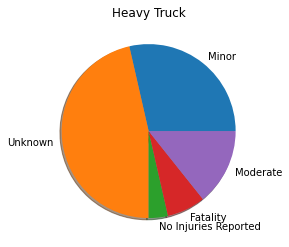

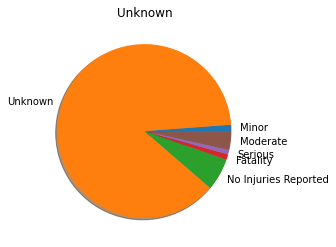

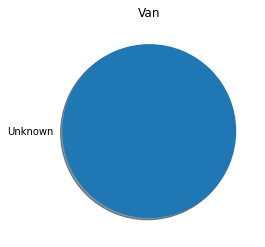

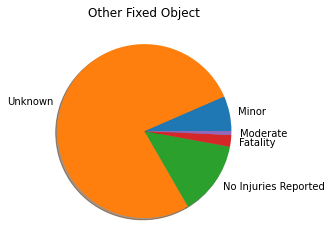

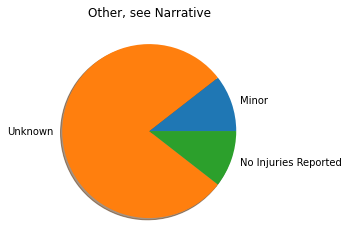

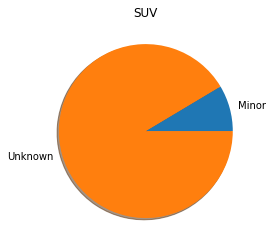

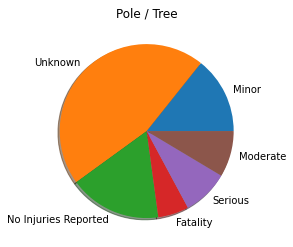

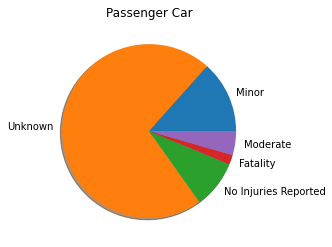

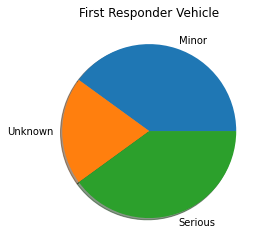

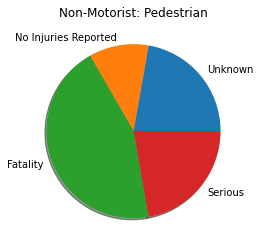

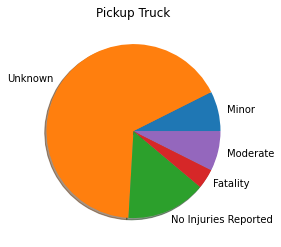

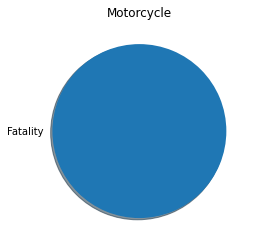

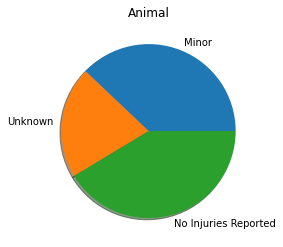

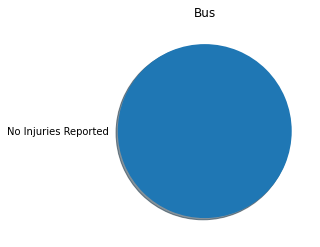

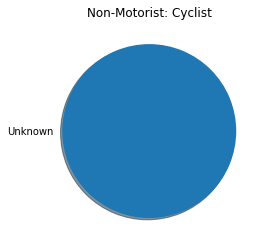

In [48]:
ADAS_crashes = ADAS_data[['Crash With', 'Highest Injury Severity']]
ADAS_crash_types = ADAS_crashes['Crash With'].unique()
ADAS_crash_severity = ADAS_crashes['Highest Injury Severity'].unique()
ADAS_crashes

plot_values = dict()

for i in ADAS_crash_types:
    plot_values[i] = {}
    crash_type = ADAS_crashes[ADAS_crashes['Crash With'] == (i)]
    for j in ADAS_crash_severity:
        crash_severity = crash_type[crash_type['Highest Injury Severity'] == (j)]['Highest Injury Severity'].count()
        if crash_severity != 0:
            plot_values[i][j] = crash_severity
    if i != 'nan':
        plt.pie(plot_values[i].values(), labels = plot_values[i].keys(), shadow = True)
        plt.title(i)
        plt.show() 

Environment of crash depending on crash type

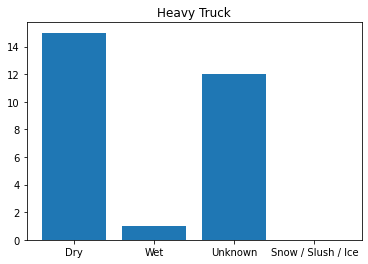

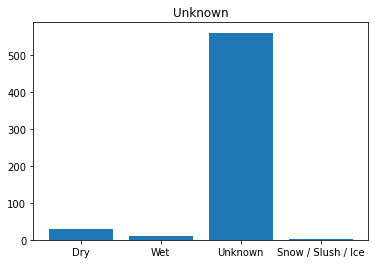

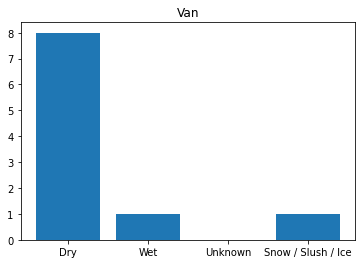

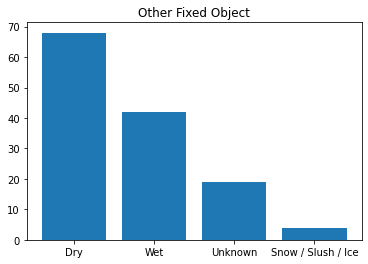

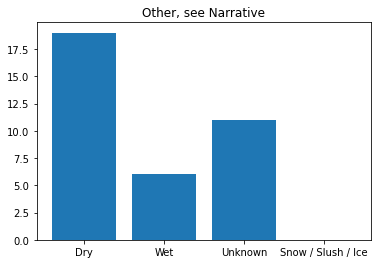

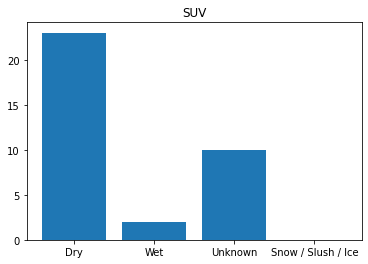

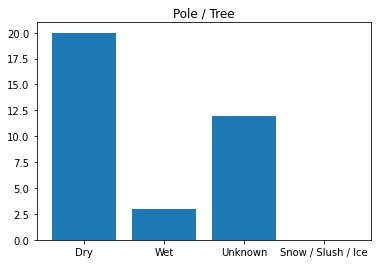

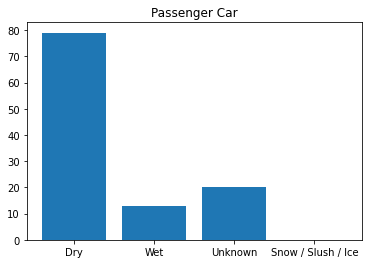

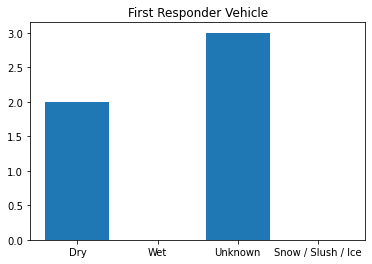

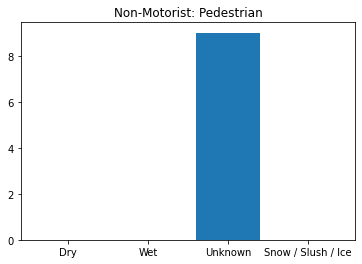

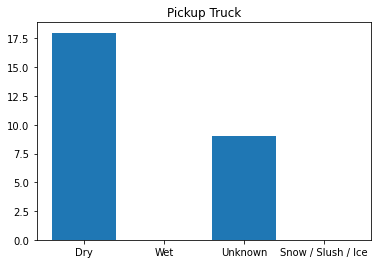

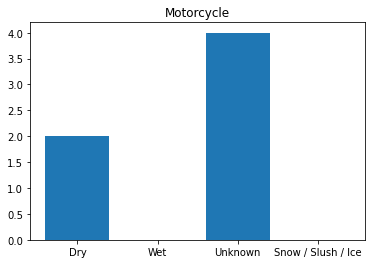

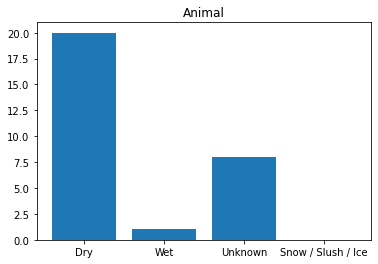

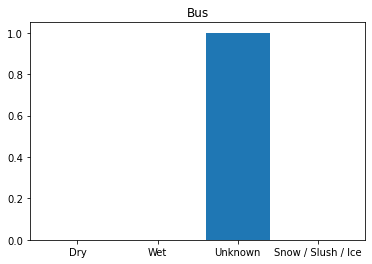

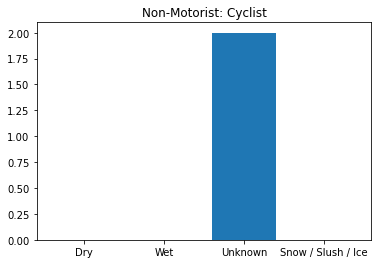

In [49]:
ADAS_crashes = ADAS_data[['Crash With', 'Roadway Surface']]
ADAS_crash_types = ADAS_crashes['Crash With'].unique()
ADAS_crash_severity = ADAS_crashes['Roadway Surface'].unique()
ADAS_crashes

for i in ADAS_crash_types:
    crash_severities = []
    environment = []
    crash_type = ADAS_crashes[ADAS_crashes['Crash With'] == (i)]
    for j in ADS_crash_severity:
        environment.append(j)
        crash_severity = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface']
        crash_severity_count = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface'].count()
        crash_severities.append(crash_severity_count)
    for k in range(len(environment)-1):
        if not isinstance(environment[k], str):
            if math.isnan(environment[k]):
                environment.pop(k)
                crash_severities.pop(k)
    plt.bar(environment, crash_severities)
    plt.title(i)
    plt.show() 

Initially, I thought there would be more crashes in wet weather since you need to break earlier to come to a stop and it can be more difficult to control a car in wet weather. However, for all vehicle crash type, there are more crashes with vehicles in dry conditions.